In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement


In [ ]:
Jo_Read_Data = pd.read_csv("assignment1dataset.csv")
Y_Jo_Target = Jo_Read_Data['RevenuePerDay'].values
X_Jo_Features = Jo_Read_Data.iloc[:, 1:]

Selected Features with correlation > 0.5 to 'RevenuePerDay':
['NCustomersPerDay', 'AverageOrderValue']


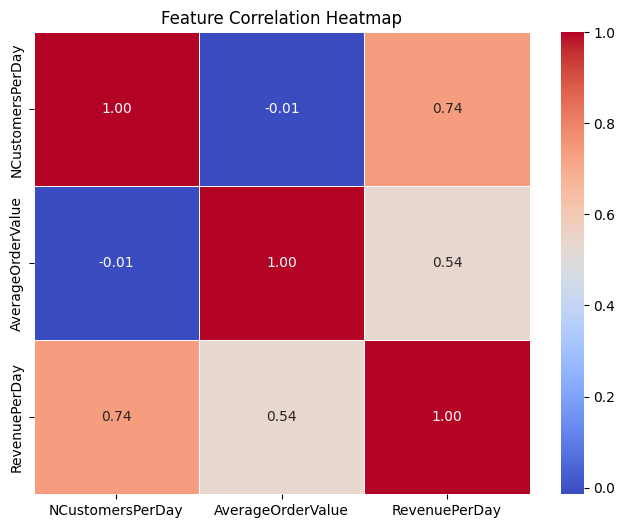

In [ ]:
corr_with_target = Jo_Read_Data.corr()[['RevenuePerDay']].abs()
top_features = corr_with_target[corr_with_target['RevenuePerDay'] > 0.5].index
top_features = top_features.drop('RevenuePerDay')
X_Jo_Features = Jo_Read_Data[top_features].values
print("Selected Features with correlation > 0.5 to 'RevenuePerDay':")
print(top_features.tolist())

selected_corr = Jo_Read_Data[top_features.tolist() + ['RevenuePerDay']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
Jo_X_Minimum = X_Jo_Features.min(axis=0)
Jo_X_Maximum = X_Jo_Features.max(axis=0)
X_Jo_Features = (X_Jo_Features - Jo_X_Minimum) / (Jo_X_Maximum - Jo_X_Minimum)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Jo_Features, Y_Jo_Target, test_size=0.2, random_state=42)


In [ ]:
def Jo_polynomial_Regression(Jo_X, Jo_degree):
    m, n = Jo_X.shape
    Jo_X_polynomial = [np.ones(m)]
    for jo_poly_loop in range(1, Jo_degree + 1):
        for Jo_Combinations in combinations_with_replacement(range(n), jo_poly_loop):
            Jo_X_polynomial.append(np.prod(Jo_X[:, Jo_Combinations], axis=1))
    return np.column_stack(Jo_X_polynomial)

def Jo_MeanSquareError(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
Jo_Degrees_List = [1, 2, 3, 4, 5]
Jo_Train_Errors_List = []
Jo_Test_Errors_List = []

for Jo_Degree_Loop in Jo_Degrees_List:
    Jo_X_Train_Polynomial = Jo_polynomial_Regression(X_train, Jo_Degree_Loop)
    Jo_X_Test_Polynomial = Jo_polynomial_Regression(X_test, Jo_Degree_Loop)

    Jo_Linear_Model = LinearRegression()
    Jo_Linear_Model.fit(Jo_X_Train_Polynomial, y_train)

    Jo_Train_Errors_List.append(Jo_MeanSquareError(y_train, Jo_Linear_Model.predict(Jo_X_Train_Polynomial)))
    Jo_Test_Errors_List.append(Jo_MeanSquareError(y_test, Jo_Linear_Model.predict(Jo_X_Test_Polynomial)))
    print(f"Degree {Jo_Degree_Loop}: Train MSE = {Jo_Train_Errors_List[-1]:.2f}, Test MSE = {Jo_Test_Errors_List[-1]:.2f}")


Degree 1: Train MSE = 152592.99, Test MSE = 146760.88
Degree 2: Train MSE = 85717.01, Test MSE = 84845.66
Degree 3: Train MSE = 85493.04, Test MSE = 85038.33
Degree 4: Train MSE = 85220.67, Test MSE = 85470.83
Degree 5: Train MSE = 85070.79, Test MSE = 85729.21


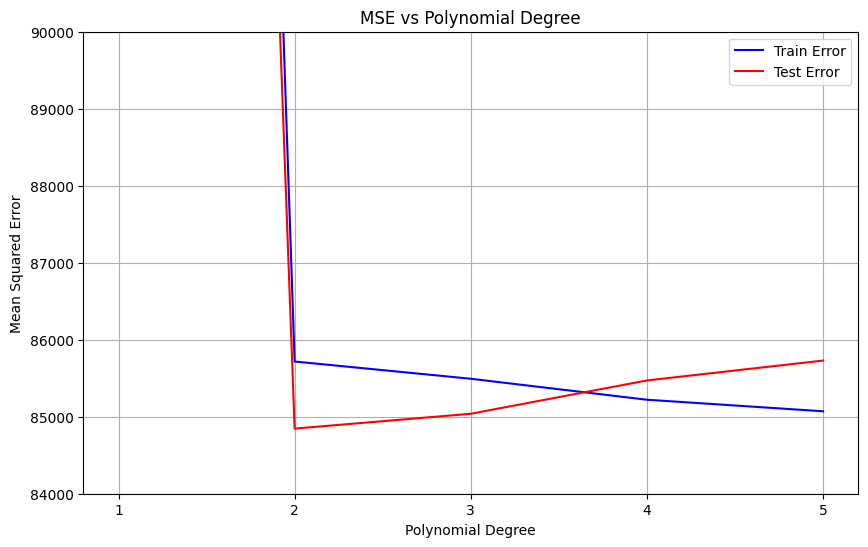

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(Jo_Degrees_List, Jo_Train_Errors_List, 'b-', label='Train Error')
plt.plot(Jo_Degrees_List, Jo_Test_Errors_List, 'r-', label='Test Error')
plt.xticks(Jo_Degrees_List)
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Polynomial Degree")
plt.legend()
plt.ylim(84000, 90000)
plt.grid(True)
plt.show()